### ЗАДАНИЕ
С использованием библиотек Numpy и Pandas написать программу реализующую:
* Загрузку текстового файла из корневого каталога объемом не менее 20000 символов включая пробелы и все символы.
* Подсчет частоты встречаемости слов в загруженном файле (критерий схожести слов выбрать самостоятельно).
* Подсчет длин предложений и их количества.
* Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы “объекты - признаки”.
* Построение гистограммы частоты встречаемости слов.

In [376]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string
from collections import Counter
import pandas as pd

In [377]:
nlp = spacy.load("en_core_web_sm")

Переменные

In [378]:
# Путь к текстовому файлу для анализа
path='book.txt'

# Сколько топ слов по встречаемости отобразить на графике
top_count=30

# Дополнительные стоп слова
additionalStopWords=set(('\n', '\n\n', '—'));

Чтения текста из файла

In [379]:
with open(path, encoding="utf8") as f:
        text = f.read();

Количество символов в тексте



In [380]:
len(text)

561022

Лематизация текста

In [381]:
tokenSource = nlp(text)
tokens = [word.lemma_.lower() for word in tokenSource]

Фильтрация знаков препинания

In [382]:
tokens = [word for word in tokens
          if word not in string.punctuation]

Фильтрация стоп слов

In [383]:
tokens = [word for word in tokens
          if word not in STOP_WORDS
          and word not in additionalStopWords]

Подсчет частоты встречаемости слов

In [384]:
counter = Counter(tokens)

Количество уникальных слов

In [385]:
len(counter.items())

6542

перевод Counter в Series


In [386]:
topWords = counter.most_common(top_count)
series = pd.Series((v[1] for v in topWords), (v[0] for v in topWords))

Отображение графика топ слов по встречаемости

<AxesSubplot:>

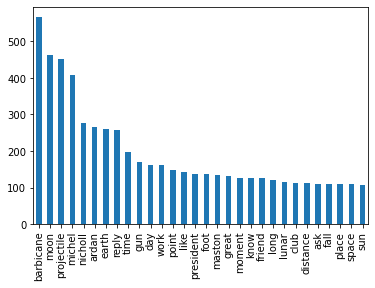

In [387]:
series.plot(kind="bar")

Количество предложений

In [388]:
sentence_tokens = [[t.text for t in sent] for sent in tokenSource.sents]
len(sentence_tokens)

5165